# Microscopy Scripts...
1) Simulate a Fluorophore and Display it!

In [1]:
import numpy as np

# Define parameter values
PSFsigma = 1
MeanPhot = 200
# Generate 5 sigma of random numbers for emission times
sample = int(MeanPhot + np.round(np.sqrt(MeanPhot)*5))
rndvals = np.random.rand(sample)
# Turn random values into exponentially distributed wait times
times = -np.log(1-rndvals)/MeanPhot
times = np.cumsum(times)
numvals = np.sum(times<1)
# generate an x-y list of photon positions
x = PSFsigma*np.random.randn(numvals)+4*PSFsigma
y = PSFsigma*np.random.randn(numvals)+4*PSFsigma
# convert x-y list into a matrix
photbins = np.column_stack((x.astype(int),y.astype(int)))
# create a blank matrix
im = np.zeros([8,8])
# loop over each photon and populate the empty matrix with counts
for ii in range(0,numvals):
    indvar = photbins[ii]
    im[indvar[0],indvar[1]]+=1
    #print(im[indvar[0],indvar[1]])

noyz = np.random.rand(8,8)
noyz[noyz<0] = 0.01

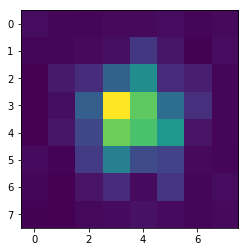

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(im+noyz)
plt.show()

In [3]:
print(im)
#print(indvar)
#print(photpos)

[[  0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   1.   4.   1.   0.   0.]
 [  0.   2.   3.   9.  14.   3.   2.   0.]
 [  0.   1.   8.  28.  21.  10.   4.   0.]
 [  0.   1.   6.  22.  20.  15.   1.   0.]
 [  0.   0.   4.  12.   6.   5.   0.   0.]
 [  0.   0.   1.   3.   0.   4.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.]]


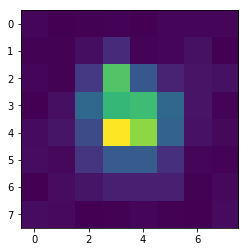

In [4]:
import genEmitter as gE

# Define parameter values
PSFsigma = 1
MeanPhot = 200
# call genEmitter function
im = gE.genEmitter(MeanPhot,PSFsigma)
# plot the fluorophore
imgplot2 = plt.imshow(im)
plt.show()

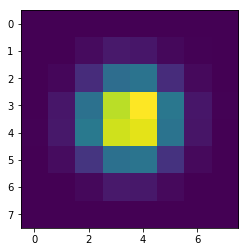

In [5]:
# create a thousand emitters and time it!
zn = np.empty([1000,8,8])
# create a blank matrix
tm = 0*np.empty([8,8])
    #tm = gE.genEmitter(MeanPhot,PSFsigma)
PSFsigma = 1
MeanPhot = 200

for xx in range(0,999):
    
    # Generate 5 sigma of random numbers for emission times
    sample = int(MeanPhot + np.round(np.sqrt(MeanPhot)*5))
    rndvals = np.random.rand(sample)
    # Turn random values into exponentially distributed wait times
    times = -np.log(1-rndvals)/MeanPhot
    times = np.cumsum(times)
    numvals = np.sum(times<1)
    # generate an x-y list of photon positions
    x = PSFsigma*np.random.randn(numvals)+4*PSFsigma
    y = PSFsigma*np.random.randn(numvals)+4*PSFsigma
    # convert x-y list into a matrix
    photbins = np.column_stack((x.astype(int),y.astype(int)))
    
    # loop over each photon and populate the empty matrix with counts
    for ii in range(0,numvals):
        indvar = photbins[ii]
        if indvar[0] < 0 or indvar[0] > 7 or indvar[1] < 0 or indvar[1] > 7:
            continue
        #from IPython.core.debugger import Tracer; Tracer()() 
        tm[indvar[0],indvar[1]]+=1
        zn[xx,:,:] = tm
    
# plot a random fluorophore
imgplot3 = plt.imshow(zn[43])
plt.show()

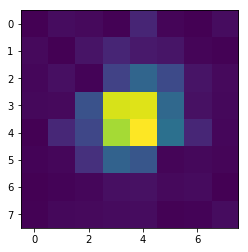

In [6]:
# testing the function in a for loop now
zn = np.empty([1000,8,8])
PSFsigma = 1
MeanPhot = 200

for xx in range(0,999):
    tm = gE.genEmitter(MeanPhot,PSFsigma)
    zn[xx,:,:] = tm
    
# plot a random fluorophore
imgplot3 = plt.imshow(zn[329])
plt.show()   

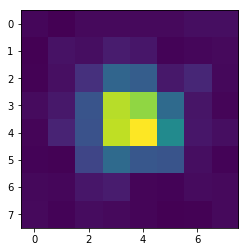

In [7]:
imgplot4 = plt.imshow(zn[5])
plt.show()